<a href="https://colab.research.google.com/github/Pacoanes/State-of-the-art/blob/master/train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import sys
sys.path.append("..")
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tqdm

import tensorflow as tf
from keras import backend as K
from keras.models import Sequential
from keras import layers as L

Using TensorFlow backend.


In [0]:
def detect_faces(cascade, test_image):
    image_copy = test_image.copy()
    faces_rect = cascade.detectMultiScale(image_copy, minSize=(50, 50), scaleFactor=1.1, minNeighbors=10)
    
    if (faces_rect==()): # si no reconoce cara
        return 0
      
    else:
        for (x, y, w, h) in faces_rect:
            r = max(w, h) / 1.17
            centerx = x + w / 2
            centery = y + h / 2
            nx = int(centerx - r)
            ny = int(centery - r)
            nr = int(r * 2)
    faceimg = image_copy[ny:ny+nr+10, nx:nx+nr+10]

    return faceimg

In [0]:
cascade_face = cv2.CascadeClassifier('/content/drive/My Drive/ban/haarcascade_frontalface_default.xml')

In [5]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 17526200263702896672, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 171812428016711422
 physical_device_desc: "device: XLA_CPU device", name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 7926500478079030716
 physical_device_desc: "device: XLA_GPU device", name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14892338381
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 12042352883733595738
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"]

In [30]:
drive.mount("/content/drive", force_remount=True)
path = "/content/drive/My Drive/ban/raw1"
training_data = []
for img in os.listdir(path):  
    try:
        img_array = cv2.imread(os.path.join(path,img))  
        faces = detect_faces(cascade_face, img_array)
        img_rgb = cv2.cvtColor(faces, cv2.COLOR_BGR2RGB)
        new_array = cv2.resize(img_rgb, (32, 32))
        training_data.append(new_array)
    except:  
        pass
print(len(training_data))

Mounted at /content/drive


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """


1365


In [0]:
training_dat = np.float32(training_data)/255.

In [32]:
IMG_SHAPE_ban=training_dat.shape[1:]
IMG_SHAPE_ban

(32, 32, 3)

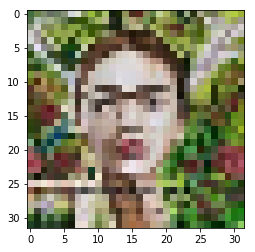

In [33]:
plt.imshow(training_dat[np.random.randint(training_dat.shape[0])], cmap="gray", interpolation="none")

In [0]:
def reset_tf_session():
    curr_session = tf.get_default_session()
    # close current session
    if curr_session is not None:
        curr_session.close()
    # reset graph
    K.clear_session()
    # create new session
    config = tf.ConfigProto()
    config.gpu_options.allow_growth = True
    s = tf.InteractiveSession(config=config)
    K.set_session(s)
    return s

In [35]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [36]:
gpu_options = tf.GPUOptions(allow_growth=True,per_process_gpu_memory_fraction=0.9)
s = tf.InteractiveSession(config=tf.ConfigProto(gpu_options=gpu_options))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/client/session.py:1735: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [37]:
"""#red generadora
CODE_SIZE = 512

generator = Sequential()
generator.add(L.InputLayer([CODE_SIZE],name='noise'))
generator.add(L.Dense(128*16*16, activation='elu'))
generator.add(L.Reshape((16,16,128)))
generator.add(L.Deconv2D(128,kernel_size=(2,2),activation='elu'))
generator.add(L.Deconv2D(64,kernel_size=(3,3),activation='elu'))
generator.add(L.UpSampling2D(size=(5,5)))
generator.add(L.Deconv2D(64,kernel_size=4,activation='elu'))
generator.add(L.Deconv2D(64,kernel_size=3,activation='elu'))
generator.add(L.Deconv2D(64,kernel_size=2,activation='elu'))
generator.add(L.Conv2D(3,kernel_size=2,activation=None))

generator.summary()"""

"#red generadora\nCODE_SIZE = 512\n\ngenerator = Sequential()\ngenerator.add(L.InputLayer([CODE_SIZE],name='noise'))\ngenerator.add(L.Dense(128*16*16, activation='elu'))\ngenerator.add(L.Reshape((16,16,128)))\ngenerator.add(L.Deconv2D(128,kernel_size=(2,2),activation='elu'))\ngenerator.add(L.Deconv2D(64,kernel_size=(3,3),activation='elu'))\ngenerator.add(L.UpSampling2D(size=(5,5)))\ngenerator.add(L.Deconv2D(64,kernel_size=4,activation='elu'))\ngenerator.add(L.Deconv2D(64,kernel_size=3,activation='elu'))\ngenerator.add(L.Deconv2D(64,kernel_size=2,activation='elu'))\ngenerator.add(L.Conv2D(3,kernel_size=2,activation=None))\n\ngenerator.summary()"

In [41]:
#red generadora
CODE_SIZE = 512

generator = Sequential()
generator.add(L.InputLayer([CODE_SIZE],name='noise'))
generator.add(L.Dense(32*8*8, activation='elu'))
generator.add(L.Reshape((8,8,32)))
generator.add(L.Deconv2D(128,kernel_size=(2,2),activation='elu'))
generator.add(L.Deconv2D(64,kernel_size=(2,2),activation='elu'))
generator.add(L.UpSampling2D(size=(3,3)))
generator.add(L.Deconv2D(64,kernel_size=2,activation='elu'))
generator.add(L.Deconv2D(64,kernel_size=2,activation='elu'))
generator.add(L.Deconv2D(64,kernel_size=2,activation='elu'))
generator.add(L.Conv2D(3,kernel_size=2,activation=None))

generator.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 2048)              1050624   
_________________________________________________________________
reshape_11 (Reshape)         (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_transpose_51 (Conv2DT (None, 9, 9, 128)         16512     
_________________________________________________________________
conv2d_transpose_52 (Conv2DT (None, 10, 10, 64)        32832     
_________________________________________________________________
up_sampling2d_11 (UpSampling (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_transpose_53 (Conv2DT (None, 31, 31, 64)        16448     
_________________________________________________________________
conv2d_transpose_54 (Conv2DT (None, 32, 32, 64)        16448     
__________

In [42]:
discriminator = Sequential()

discriminator.add(L.InputLayer(IMG_SHAPE_ban))

discriminator.add(L.Conv2D(16, kernel_size=3))
discriminator.add(L.BatchNormalization())
discriminator.add(L.advanced_activations.LeakyReLU(alpha=.1))

discriminator.add(L.Conv2D(32, kernel_size=3))
discriminator.add(L.BatchNormalization())
discriminator.add(L.advanced_activations.LeakyReLU(alpha=.1))

discriminator.add(L.MaxPooling2D(pool_size=(2, 2)))

discriminator.add(L.Conv2D(64, kernel_size=3))
discriminator.add(L.BatchNormalization())
discriminator.add(L.advanced_activations.LeakyReLU(alpha=.1))

discriminator.add(L.Conv2D(128, kernel_size=3))
discriminator.add(L.BatchNormalization())
discriminator.add(L.advanced_activations.LeakyReLU(alpha=.1))

discriminator.add(L.MaxPooling2D(pool_size=(2, 2)))


# <build discriminator body>

discriminator.add(L.Flatten())
discriminator.add(L.Dense(128,activation='tanh'))
discriminator.add(L.Dense(2,activation=tf.nn.log_softmax))


discriminator.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 30, 30, 16)        448       
_________________________________________________________________
batch_normalization_5 (Batch (None, 30, 30, 16)        64        
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 30, 30, 16)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 28, 28, 32)        4640      
_________________________________________________________________
batch_normalization_6 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
__________

In [0]:
noise = tf.placeholder('float32',[None,CODE_SIZE])
real_data = tf.placeholder('float32',[None,]+list(IMG_SHAPE_ban))

logp_real = discriminator(real_data)

generated_data = generator(noise) #<gen(noise)>

logp_gen = discriminator(generated_data) #<log P(real | gen(noise))




In [0]:
########################
#discriminator training#
########################

d_loss = -tf.reduce_mean(logp_real[:,1] + logp_gen[:,0])

#regularize
d_loss += tf.reduce_mean(discriminator.layers[-1].kernel**2)

#optimize
 
disc_optimizer = tf.train.GradientDescentOptimizer(1e-3).minimize(d_loss,var_list=discriminator.trainable_weights)

In [0]:
########################
###generator training###
########################

g_loss = tf.reduce_mean(logp_gen[:,0]) # <generator loss>

gen_optimizer =tf.train.AdamOptimizer(1e-4).minimize(g_loss,var_list=generator.trainable_weights)
    

In [0]:
s.run(tf.global_variables_initializer())

In [0]:
def sample_noise_batch(bsize):
    return np.random.normal(size=(bsize, CODE_SIZE)).astype('float32')

def sample_data_batch(bsize):
    idxs = np.random.choice(np.arange(training_dat.shape[0]), size=bsize)
    return training_dat[idxs]

def sample_images(nrow,ncol, sharp=False):
    images = generator.predict(sample_noise_batch(bsize=nrow*ncol))
    if np.var(images)!=0:
        images = images.clip(np.min(training_dat),np.max(training_dat))
    for i in range(nrow*ncol):
        plt.subplot(nrow,ncol,i+1)
        if sharp:
            plt.imshow(images[i].reshape(IMG_SHAPE_ban),cmap="gray", interpolation="none")
        else:
            plt.imshow(images[i].reshape(IMG_SHAPE_ban),cmap="gray")
    plt.show()

def sample_probas(bsize):
    plt.title('Generated vs real data')
    plt.hist(np.exp(discriminator.predict(sample_data_batch(bsize)))[:,1],
             label='D(x)', alpha=0.5,range=[0,1])
    plt.hist(np.exp(discriminator.predict(generator.predict(sample_noise_batch(bsize))))[:,1],
             label='D(G(z))',alpha=0.5,range=[0,1])
    plt.legend(loc='best')
    plt.show()

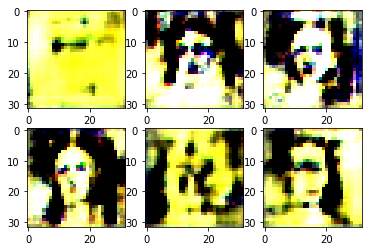

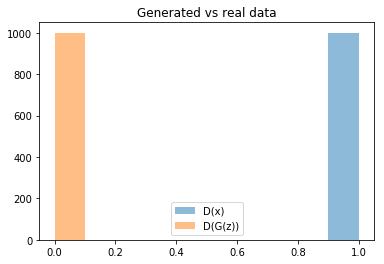



 99%|█████████▉| 9901/10000 [32:23<00:47,  2.07it/s]

 99%|█████████▉| 9902/10000 [32:23<00:38,  2.53it/s]

 99%|█████████▉| 9903/10000 [32:23<00:32,  3.01it/s]

 99%|█████████▉| 9904/10000 [32:23<00:27,  3.47it/s]

 99%|█████████▉| 9905/10000 [32:23<00:24,  3.89it/s]

 99%|█████████▉| 9906/10000 [32:24<00:22,  4.22it/s]

 99%|█████████▉| 9907/10000 [32:24<00:20,  4.50it/s]

 99%|█████████▉| 9908/10000 [32:24<00:19,  4.73it/s]

 99%|█████████▉| 9909/10000 [32:24<00:18,  4.91it/s]

 99%|█████████▉| 9910/10000 [32:24<00:17,  5.05it/s]

 99%|█████████▉| 9911/10000 [32:25<00:17,  5.15it/s]

 99%|█████████▉| 9912/10000 [32:25<00:16,  5.19it/s]

 99%|█████████▉| 9913/10000 [32:25<00:16,  5.22it/s]

 99%|█████████▉| 9914/10000 [32:25<00:16,  5.21it/s]

 99%|█████████▉| 9915/10000 [32:25<00:16,  5.27it/s]

 99%|█████████▉| 9916/10000 [32:25<00:15,  5.34it/s]

 99%|█████████▉| 9917/10000 [32:26<00:15,  5.34it/s]

 99%|█████████▉| 9918/10000 [32:26<00:15,  5.34it/s]

 99%|█████████▉| 9919/1000

In [49]:
from IPython import display
from tqdm import tqdm
for epoch in tqdm(range(10000)):
  
    feed_dict = {
        real_data:sample_data_batch(100),
        noise:sample_noise_batch(100)
    }
  
    for i in range(5):
        s.run(disc_optimizer,feed_dict)
  
    s.run(gen_optimizer,feed_dict)
  
    if epoch %100==0:
        display.clear_output(wait=True)
        sample_images(2,3,True)
        sample_probas(1000)

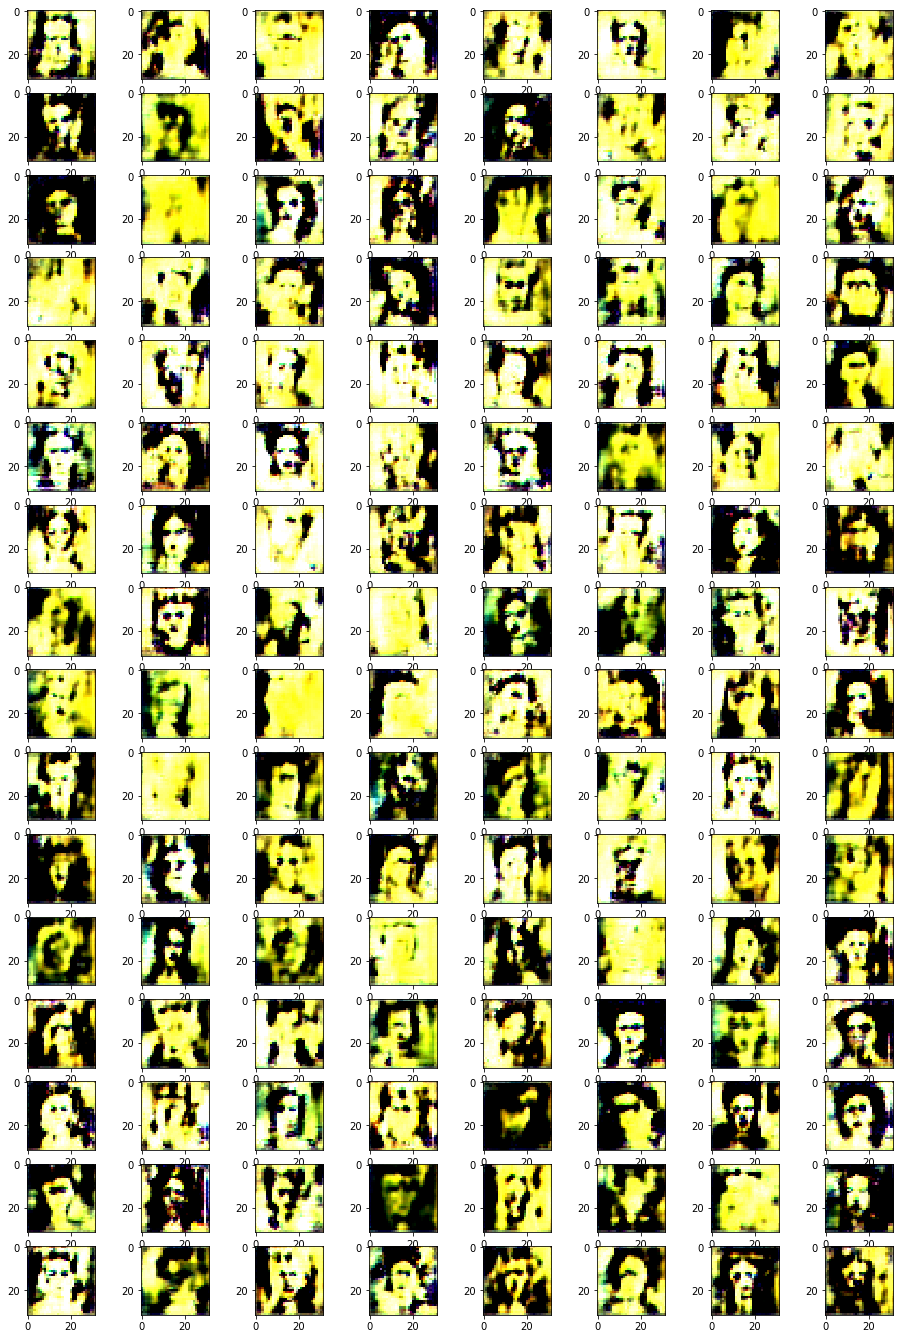

In [50]:
plt.figure(figsize=[16,24])
sample_images(16,8)

In [0]:
discriminator.save("discriminator.h5")
generator.save("generator.h5")

In [0]:
ass=generator.predict(sample_noise_batch(10000))


In [89]:
que=np.exp(discriminator.predict(generator.predict(sample_noise_batch(10000))))[:,1]


9803

In [92]:
np.argmax(que)

9803

W0804 16:03:08.466278 140104035854208 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


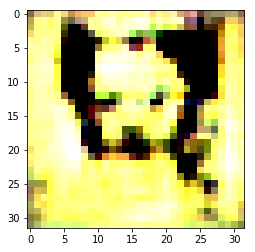

In [93]:

plt.imshow(ass[9803])
plt.show()
  